<a href="https://colab.research.google.com/github/KawshikBarua/Random-Forest-vs-MLP-vs-Support-Vector-Machine/blob/main/RF_MLP_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
mushroom = pd.read_csv('/content/drive/MyDrive/mushroom edibility classification dataset.csv')
mushroom.head(4)

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,poisonous,5.0,2,4.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
1,1,edible,5.0,2,9.0,bruises is there,0,0,2,2,2,7,7,0,2,1,4,3,2,1
2,2,edible,0.0,2,8.0,bruises is there,3,0,2,2,2,7,7,0,2,1,4,3,2,3
3,3,poisonous,5.0,3,8.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5


In [ ]:
mushroom.drop('Unnamed: 0',axis=1,inplace=True)
mushroom.isnull().sum()

class                       0
cap-shape                   8
cap-surface                 0
cap-color                   8
bruises                     0
odor                        0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
imputer = SimpleImputer(np.nan,'mean')
imputer.fit(mushroom[['cap-shape']])
imputer.fit(mushroom[['cap-color']])
mushroom['cap-shape']=imputer.fit_transform(mushroom[['cap-shape']])
mushroom['cap-color']=imputer.fit_transform(mushroom[['cap-color']])

In [ ]:
encoder = LabelEncoder()
mushroom['bruises-enc']=encoder.fit_transform(mushroom['bruises'])
mushroom.drop('bruises',axis=1,inplace= True)
mushroom.drop('veil-type',axis=1,inplace=True)
mushroom.drop('veil-color',axis=1, inplace=True)
mushroom.drop('ring-number',axis=1, inplace=True)
mushroom.head()

,class,cap-shape,cap-surface,cap-color,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat,bruises-enc
0,poisonous,5.0,2,4.0,6,0,3,2,2,7,7,4,2,3,5,0
1,edible,5.0,2,9.0,0,0,2,2,2,7,7,4,3,2,1,0
2,edible,0.0,2,8.0,3,0,2,2,2,7,7,4,3,2,3,0
3,poisonous,5.0,3,8.0,6,0,3,2,2,7,7,4,2,3,5,0
4,edible,5.0,2,3.0,5,1,3,2,2,7,7,0,3,0,1,1


In [ ]:
mushroom.drop(['ring-type'],axis=1,inplace=True)
mushroom.drop(['stalk-shape'],axis=1,inplace=True)
mushroom.drop(['stalk-root'],axis=1,inplace=True)
mushroom.drop(['cap-color'],axis=1,inplace=True)
mushroom.drop(['population'],axis=1,inplace=True)

In [ ]:
target=mushroom.iloc[:,:1]
dataset=mushroom.iloc[:,1:]
x_train,x_test,y_train,y_test= train_test_split(dataset,target,test_size=0.20,random_state=42)

In [ ]:
svc= SVC(kernel="poly")
svc.fit(x_train,y_train.values.ravel())
accuracy_SVC = svc.score(x_test,y_test)

rf=RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train.values.ravel())
accuracy_RF=rf.score(x_test,y_test)

mlp=MLPClassifier(hidden_layer_sizes=(5),activation='relu',max_iter=10000)
mlp.fit(x_train,y_train.values.ravel())
accuracy_MLP=mlp.score(x_test,y_test)



In [ ]:
print('Accuracy using the Support Vetor Classifier is : '+str(accuracy_SVC))
print('Accuracy using the Random Forest Classifier is : '+str(accuracy_RF))
print('Accuracy using the Multi Layer Perceptron Classifier is : '+str(accuracy_MLP))

Accuracy using the Support Vetor Classifier is : 0.9872
Accuracy using the Random Forest Classifier is : 1.0
Accuracy using the Multi Layer Perceptron Classifier is : 1.0


In [ ]:
mushroom.head()

,class,cap-shape,cap-surface,odor,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,spore-print-color,habitat,bruises-enc
0,poisonous,5.0,2,6,2,2,7,7,2,5,0
1,edible,5.0,2,0,2,2,7,7,3,1,0
2,edible,0.0,2,3,2,2,7,7,3,3,0
3,poisonous,5.0,3,6,2,2,7,7,2,5,0
4,edible,5.0,2,5,2,2,7,7,3,1,1


In [ ]:
#Principle Component Analysis
pca=PCA(n_components=5)
mushroom['class-enc']=encoder.fit_transform(mushroom['class'])
mushroom.drop('class',axis=1,inplace=True)
components=pca.fit_transform(mushroom)

In [ ]:
sum(pca.explained_variance_ratio_)

0.8341388616148121

In [ ]:
mushroom_df = pd.DataFrame(data=components,columns=['Comp_1','Comp_2','Comp_3','Comp_4','Comp_5'])
concat_df=pd.concat([mushroom_df,mushroom[['class-enc']]],axis=1)
concat_df.head()

,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5,class-enc
0,0.325865,-1.505081,-3.349530,2.655001,1.213839,1
1,2.388694,3.357383,-0.792005,-1.599868,0.269993,0
2,3.527720,-1.534682,1.668712,0.929902,0.397240,0
3,0.567444,-1.259368,-3.456138,3.186776,0.497924,1
4,-0.606071,-0.141995,-1.679267,-0.244628,-0.812813,0


In [ ]:
target=concat_df.iloc[:,-1:]
dataset=concat_df.iloc[:,:-1]
x_train,x_test,y_train,y_test= train_test_split(dataset,target,test_size=0.20,random_state=42)

In [ ]:
svc= SVC(kernel="poly")
svc.fit(x_train,y_train.values.ravel())
accuracy_SVC_PCA = svc.score(x_test,y_test)

rf=RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train.values.ravel())
accuracy_RF_PCA=rf.score(x_test,y_test)

mlp=MLPClassifier(hidden_layer_sizes=(5),activation='relu',max_iter=10000)
mlp.fit(x_train,y_train.values.ravel())
accuracy_MLP_PCA=mlp.score(x_test,y_test)

In [ ]:
print('Accuracy using the Support Vetor Classifier after performing PCA is : '+str(accuracy_SVC_PCA))
print('Accuracy using the Random Forest Classifier after performing PCA is : '+str(accuracy_RF_PCA))
print('Accuracy using the Multi Layer Perceptron Classifier after performing PCA is : '+str(accuracy_MLP_PCA))

Accuracy using the Support Vetor Classifier after performing PCA is : 0.9888
Accuracy using the Random Forest Classifier after performing PCA is : 1.0
Accuracy using the Multi Layer Perceptron Classifier after performing PCA is : 0.9904


(-0.2, 3.0, 0.5, 1.1)

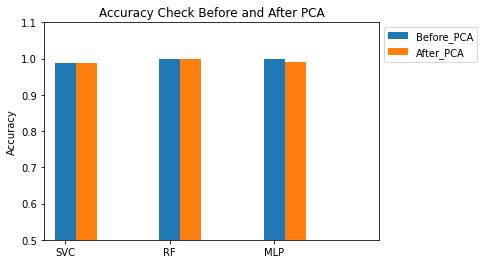

In [ ]:
accuracy_name=['SVC','RF','MLP']
value=[accuracy_SVC,accuracy_RF,accuracy_MLP]
value_PCA=[accuracy_SVC_PCA,accuracy_RF_PCA,accuracy_MLP_PCA]
plt.title("Accuracy Check Before and After PCA")
plt.ylabel("Accuracy")
ypos=np.arange(len(accuracy_name))
plt.xticks(ypos,accuracy_name)
ypos=np.arange(len(accuracy_name))
plt.bar(ypos,value,width=0.2,label="Before_PCA")
plt.bar(ypos+0.2,value_PCA,width=0.2,label="After_PCA")
plt.legend(bbox_to_anchor=(1,1))
plt.axis([-0.2,3,0.5,1.1])